In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
data = pd.read_csv('rfm_data.csv')

In [5]:
data.head()


,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [6]:
data['PurchaseDate']

0      2023-04-11
1      2023-04-11
2      2023-04-11
3      2023-04-11
4      2023-04-11
          ...    
995    2023-06-10
996    2023-06-10
997    2023-06-10
998    2023-06-10
999    2023-06-10
Name: PurchaseDate, Length: 1000, dtype: object

In [7]:
# Convert 'PurchaseDate' to datetime
data['PurchaseDate'] = pd.to_datetime(data['PurchaseDate'])

# Calculate Recency
data['Recency'] = (datetime.now() - data['PurchaseDate']).dt.days

# Calculate Frequency
frequency_data = data.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns={'OrderID': 'Frequency'}, inplace=True)
data = data.merge(frequency_data, on='CustomerID', how='left')

# Calculate Monetary Value
monetary_data = data.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace=True)
data = data.merge(monetary_data, on='CustomerID', how='left')

In [8]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,227,1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,227,1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,227,1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,227,1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,227,1,739.56


In [9]:
# Defining and Calculating RFM scores
recency_scores = [5,4,3,2,1]
frequency_scores = [1,2,3,4,5]
monetary_scores = [1,2,3,4,5]

data['Recency_scores'] = pd.cut(data['Recency'], bins = 5, labels = recency_scores)
data['Frequency_scores'] = pd.cut(data['Frequency'], bins = 5, labels = frequency_scores)
data['monetary_scores'] = pd.cut(data['MonetaryValue'], bins = 5, labels = monetary_scores)


In [10]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,Recency_scores,Frequency_scores,monetary_scores
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,227,1,943.31,1,1,2
1,2188,2023-04-11,463.70,Product A,176819,London,227,1,463.70,1,1,1
2,4608,2023-04-11,80.28,Product A,340062,New York,227,1,80.28,1,1,1
3,2559,2023-04-11,221.29,Product A,239145,London,227,1,221.29,1,1,1
4,9482,2023-04-11,739.56,Product A,194545,Paris,227,1,739.56,1,1,2


In [11]:
data.columns

Index(['CustomerID', 'PurchaseDate', 'TransactionAmount', 'ProductInformation',
       'OrderID', 'Location', 'Recency', 'Frequency', 'MonetaryValue',
       'Recency_scores', 'Frequency_scores', 'monetary_scores'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   CustomerID          1000 non-null   int64         
 1   PurchaseDate        1000 non-null   datetime64[ns]
 2   TransactionAmount   1000 non-null   float64       
 3   ProductInformation  1000 non-null   object        
 4   OrderID             1000 non-null   int64         
 5   Location            1000 non-null   object        
 6   Recency             1000 non-null   int64         
 7   Frequency           1000 non-null   int64         
 8   MonetaryValue       1000 non-null   float64       
 9   Recency_scores      1000 non-null   category      
 10  Frequency_scores    1000 non-null   category      
 11  monetary_scores     1000 non-null   category      
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 74.0+ KB


In [13]:
# Convert RFM scores to numeric type
data['Recency_scores'] = data['Recency_scores'].astype(int)
data['Frequency_scores'] = data['Frequency_scores'].astype(int)
data['monetary_scores'] = data['monetary_scores'].astype(int)

In [14]:
#calculating final RFM scores
data['RFM_score'] = data['Recency_scores'] + data['Frequency_scores'] + data['monetary_scores']


In [15]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,Recency_scores,Frequency_scores,monetary_scores,RFM_score
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,227,1,943.31,1,1,2,4
1,2188,2023-04-11,463.70,Product A,176819,London,227,1,463.70,1,1,1,3
2,4608,2023-04-11,80.28,Product A,340062,New York,227,1,80.28,1,1,1,3
3,2559,2023-04-11,221.29,Product A,239145,London,227,1,221.29,1,1,1,3
4,9482,2023-04-11,739.56,Product A,194545,Paris,227,1,739.56,1,1,2,4


In [16]:
#Creating RFM segments based on the RFM score
segment_labels = ['low_value','mid_value','high_value']
data['value_segments'] = pd.qcut(data['RFM_score'], q=3, labels=segment_labels)

In [17]:
data.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue,Recency_scores,Frequency_scores,monetary_scores,RFM_score,value_segments
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,227,1,943.31,1,1,2,4,low_value
1,2188,2023-04-11,463.70,Product A,176819,London,227,1,463.70,1,1,1,3,low_value
2,4608,2023-04-11,80.28,Product A,340062,New York,227,1,80.28,1,1,1,3,low_value
3,2559,2023-04-11,221.29,Product A,239145,London,227,1,221.29,1,1,1,3,low_value
4,9482,2023-04-11,739.56,Product A,194545,Paris,227,1,739.56,1,1,2,4,low_value


In [18]:
data.info

<bound method DataFrame.info of      CustomerID PurchaseDate  TransactionAmount ProductInformation  OrderID  \
0          8814   2023-04-11             943.31          Product C   890075   
1          2188   2023-04-11             463.70          Product A   176819   
2          4608   2023-04-11              80.28          Product A   340062   
3          2559   2023-04-11             221.29          Product A   239145   
4          9482   2023-04-11             739.56          Product A   194545   
..          ...          ...                ...                ...      ...   
995        2970   2023-06-10             759.62          Product B   275284   
996        6669   2023-06-10             941.50          Product C   987025   
997        8836   2023-06-10             545.36          Product C   512842   
998        1440   2023-06-10             729.94          Product B   559753   
999        4759   2023-06-10             804.28          Product D   467544   

     Location  Rece

In [19]:
segment_counts = data['value_segments'].value_counts().reset_index()

In [20]:
segment_counts.columns = ['value_segment','count']

In [21]:
segment_counts.head()

,value_segment,count
0,low_value,435
1,mid_value,386
2,high_value,179


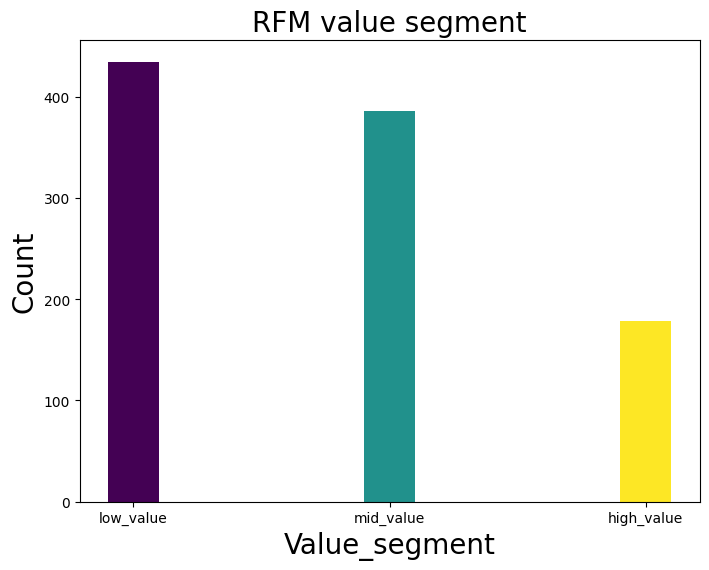

In [22]:
plt.subplots(figsize=(8,6))
colors = plt.cm.viridis(np.linspace(0,1,len(segment_counts['value_segment'])))
plt.bar(segment_counts['value_segment'], segment_counts['count'],width=0.2,color=colors)
plt.title('RFM value segment', fontsize=20)
plt.xlabel('Value_segment', fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.savefig('RFMvaluesegment.png')
plt.show()

In [23]:
#Lets name the customers as 'champions', 'potential loyalists', 'At risk', 'can't lose', 'lost' based on the RFM score
data['RFM_customer_name'] = ''
data.loc[data['RFM_score'] >= 9, 'RFM_customer_name'] = 'Champions'
data.loc[(data['RFM_score']>=6) & (data['RFM_score']<9), 'RFM_customer_name'] = 'Potential loyalists'
data.loc[(data['RFM_score']>=5) & (data['RFM_score']<6), 'RFM_customer_name'] = 'At Risk'
data.loc[(data['RFM_score']>=4) & (data['RFM_score']<5), 'RFM_customer_name'] = 'can\'t lose'
data.loc[(data['RFM_score']>=3) & (data['RFM_score']<4), 'RFM_customer_name'] = 'Lost'


In [24]:
data[['CustomerID','RFM_customer_name']]

,CustomerID,RFM_customer_name
0,8814,can't lose
1,2188,Lost
2,4608,Lost
3,2559,Lost
4,9482,can't lose
...,...,...
995,2970,Potential loyalists
996,6669,Potential loyalists
997,8836,Potential loyalists
998,1440,Potential loyalists


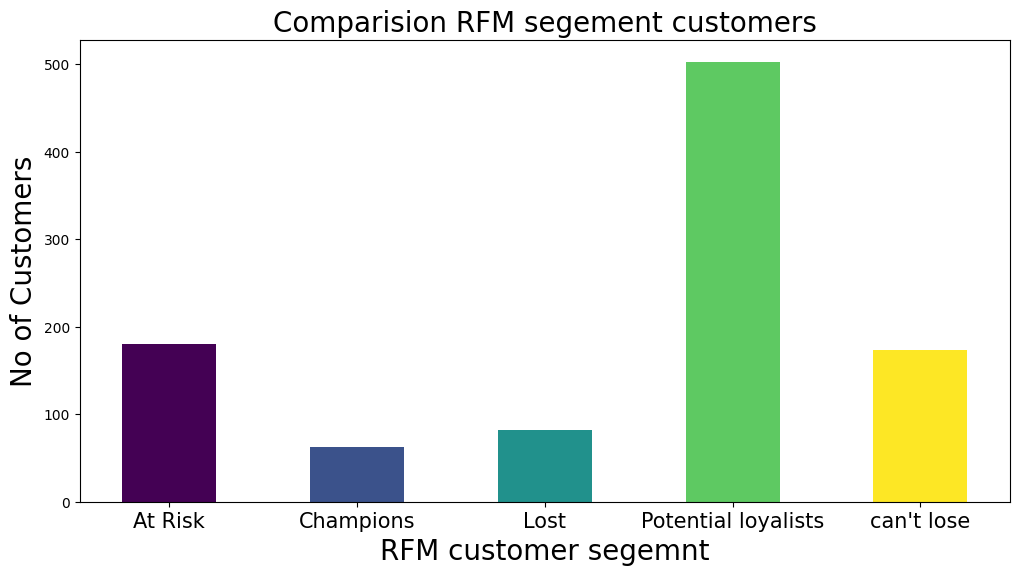

In [25]:
plt.subplots(figsize=(12,6))
segment_counts = data.groupby('RFM_customer_name')['CustomerID'].count().reset_index()
colors = plt.cm.viridis(np.linspace(0,1,len(segment_counts['RFM_customer_name'])))
plt.bar(segment_counts['RFM_customer_name'], segment_counts['CustomerID'], color=colors, width=0.5)
plt.title('Comparision RFM segement customers', fontsize=20)
plt.xlabel('RFM customer segemnt',fontsize=20)
plt.ylabel('No of Customers',fontsize=20)
plt.xticks(fontsize=15)
plt.savefig('RFM_customer_segments.png')
plt.show()

In [26]:
segment_counts = data.groupby('RFM_customer_name')['CustomerID'].count().reset_index()

In [27]:
segment_counts.head()

,RFM_customer_name,CustomerID
0,At Risk,180
1,Champions,62
2,Lost,82
3,Potential loyalists,503
4,can't lose,173
